In [1]:
#R1
import math
import numpy as np
import random
import matplotlib.pyplot as plt
n=100
r=math.floor(n*0.3)
mu=[5, -1]
Sigma=[[1.3,0.4],[0.4,0.9]]
Y=np.random.multivariate_normal(size=n,mean=mu,cov=Sigma)
f=[1 for i in range(n-r)]
g=[0 for i in range(r)]
h=f+g
random.shuffle(h)
for i in range(len(h)):
    if h[i]==0:
        Y[i,1]=None

In [2]:
#R2
hat_mu1=(1/n)*sum(Y[:,0])
def cleared_arr(a):
    b=list()
    for i in range(len(a)):
        if np.isnan(Y[i,1])==False:
            b.append(Y[i])
    return np.squeeze(b)
def estimators(a):
    y1_bar=np.mean(a[:,0])
    y2_bar=np.mean(a[:,1])
    s11=np.mean((a[:,0]-y1_bar)**2)
    s22=np.mean((a[:,1]-y2_bar)**2)
    s12=np.mean((a[:,0]-y1_bar)*(a[:,1]-y2_bar))
    return y1_bar, y2_bar, s11, s22, s12
y1_bar, y2_bar, s11, s22, s12 = estimators(cleared_arr(Y))
hat_beta_21_1=s12/s11
hat_beta_20_1 = y2_bar-hat_beta_21_1*y1_bar
hat_mu2=hat_beta_21_1*hat_mu1+hat_beta_20_1
res_ml=(hat_mu1,hat_mu2)

In [3]:
#R3
def Estep(Y,mu,Sigma):
    n=len(Y)
    sigma_22_1=Sigma[1,1]-(Sigma[0,1]**2)/Sigma[0,0]
    beta_21_1=Sigma[0,1]/Sigma[0,0]
    beta_20_1=mu[1]-beta_21_1*mu[0]
    E_y2=np.zeros(n)
    for i in range(len(Y)):
        if np.isnan(Y[i,1])==True:
            E_y2[i]=beta_20_1+beta_21_1*Y[i,0]
        else:
            E_y2[i]=Y[i,1]
    E_y1=Y[:,0].copy()
    E_y2_y2=np.zeros(n)
    for i in range(len(E_y2)):
        if np.isnan(Y[i,1])==True:
            E_y2_y2[i]=E_y2[i]**2+sigma_22_1
        else: 
            E_y2_y2[i]=E_y2[i]**2
    E_y1_y1=Y[:,0]**2
    E_y1_y2=np.zeros(n)
    E_y1_y2=E_y2*E_y1
    return sum(E_y1), sum(E_y2), sum(E_y1_y1), sum(E_y1_y2), sum(E_y2_y2)
# s1, s2, s11, s12, s22
def Mstep(Y, s1, s2, s11, s12, s22):
    n=len(Y)
    mu1=s1/n
    mu2=s2/n
    sigma1=s11/n-mu1**2
    sigma2=s22/n-mu2**2
    sigma12=s12/n-mu1*mu2
    mu=np.array([mu1,mu2],dtype=np.float64)
    Sigma=np.array([[sigma1,sigma12],[sigma12,sigma2]],dtype=np.float64)
    return mu,Sigma
            
    



In [4]:
#R4
def initEM(Y):
    n=len(Y)
    mv=0
    for i in range(len(Y)):
        if np.isnan(Y[i,1])==True:
            mv+=1
    r=n-mv
    mu1=np.mean(Y[:,0])
    Z=Y[:,1]
    Z0=list()
    for i in range(len(Y)):
        if np.isnan(Y[i,1])==False:
            Z0.append(Y[i,0])
    Z = Z[~np.isnan(Z)]
    mu2=np.mean(Z)
    s1=np.mean(Y[:,0]**2)-mu1**2
    s2=np.mean(Z)-mu2**2
    s12=np.mean(Z0*Z)-mu1*mu2
    mu=np.array([mu1,mu2],dtype=np.float64)
    Sigma=np.array([[s1,s12],[s12,s2]],dtype=np.float64)
    return mu,Sigma
    


mu: [ 5.03427566 -0.95900619] 
 Sigma: [[ 1.27106141  0.54469364]
 [ 0.54469364 -1.87869906]]


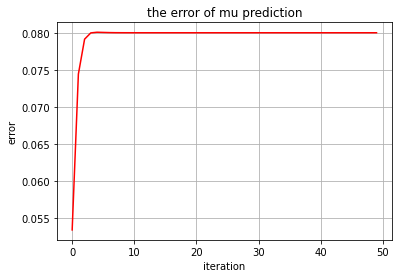

In [5]:
#R5
i_mu,i_Sigma=initEM(Y)
hat_mu=i_mu.copy()
hat_Sigma=i_Sigma.copy()
print('mu:',i_mu,'\n','Sigma:',i_Sigma)
error_mu=np.zeros(50)

for i in range(50):
    error_mu[i]=np.sqrt(sum((hat_mu-mu)**2))
    s1, s2, s11, s12, s22 = Estep(Y,hat_mu, hat_Sigma)
    hat_mu,hat_Sigma = Mstep(Y, s1, s2, s11, s12, s22)
plt.plot(list(error_mu),color='red')
plt.title('the error of mu prediction')
plt.xlabel('iteration')
plt.ylabel('error')
plt.grid()
plt.show()
    


In [6]:
#R6
resEM=hat_mu
print('res_ml',res_ml)
print('resEM',resEM)

res_ml (5.034275658767809, -0.9277031604604633)
resEM [ 5.03427566 -0.92770316]


In [7]:
#Q7
i_mu,i_Sigma=initEM(Y)
hat_mu=i_mu.copy()
old_hat_mu=old_old_hat_mu=0
hat_Sigma=i_Sigma.copy()
error_mu=np.zeros(20)
for i in range(20):
    old_old_hat_mu=old_hat_mu
    old_hat_mu=hat_mu
    s1, s2, s11, s12, s22 = Estep(Y,hat_mu, hat_Sigma)
    hat_mu,hat_Sigma = Mstep(Y, s1, s2, s11, s12, s22)
    if (i>=3):
        print('Iteration=',i,", Convergence rate of mu2 =",(hat_mu-old_hat_mu)[1]/(old_hat_mu-old_old_hat_mu)[1],'\n')
num_miss=0
num=len(Y[:,1])
for i in range(len(Y)):
    if np.isnan(Y[i,1]):
        num_miss+=1
print("Percentage of missingness is:", num_miss/num)

Iteration= 3 , Convergence rate of mu2 = 0.10156994592529656 

Iteration= 4 , Convergence rate of mu2 = -0.28460111982977243 

Iteration= 5 , Convergence rate of mu2 = 0.9330989504736467 

Iteration= 6 , Convergence rate of mu2 = 0.5151353594829489 

Iteration= 7 , Convergence rate of mu2 = 0.43587577056273347 

Iteration= 8 , Convergence rate of mu2 = 0.4036999113483598 

Iteration= 9 , Convergence rate of mu2 = 0.38703238341825763 

Iteration= 10 , Convergence rate of mu2 = 0.3773087698613929 

Iteration= 11 , Convergence rate of mu2 = 0.3712393692515451 

Iteration= 12 , Convergence rate of mu2 = 0.3672897292651139 

Iteration= 13 , Convergence rate of mu2 = 0.3646493970978028 

Iteration= 14 , Convergence rate of mu2 = 0.36285248540200976 

Iteration= 15 , Convergence rate of mu2 = 0.36161460548137314 

Iteration= 16 , Convergence rate of mu2 = 0.3607544745975004 

Iteration= 17 , Convergence rate of mu2 = 0.36015327181410095 

Iteration= 18 , Convergence rate of mu2 = 0.3597340222

In [8]:
#R7-1
n = 100
r = math.floor(n*0.3)
mu = [5, -1]
Sigma = [[1.3,0.4],[0.4,0.9]]
Y=np.random.multivariate_normal(size=n,mean=mu,cov=Sigma)
f=[1 for i in range(n-r)]
g=[0 for i in range(r)]
h=f+g
random.shuffle(h)
Y1=Y.copy()
for i in range(len(h)):
    if h[i]==0:
        Y1[i,1]=None
Y2=Y.copy()
MinValueToDelete=np.flip(np.sort(Y[:,1]))[29]
deletescore=0
for i in range(len(Y2)):
    if deletescore<30 and Y2[i,1]>=MinValueToDelete:
        Y2[i,1]=None


In [10]:
#R7-2
i1_mu, i1_Sigma = initEM(Y1)
hat_mu_MAR=i1_mu
hat_Sigma_MAR=i1_Sigma
i2_mu, i2_Sigma = initEM(Y2)
hat_mu_MNAR=i2_mu
hat_Sigma_MNAR=i2_Sigma

#MAR
i1_mu, i1_Sigma = initEM(Y1)
hat_mu_MAR=i1_mu
hat_Sigma_MAR=i1_Sigma
error_mu=np.zeros(50)
for i in range(50):
    error_mu[i]=np.sqrt(sum((hat_mu_MAR-mu)**2))
    # E step
    s1, s2, s11, s12, s22=Estep(Y1, hat_mu_MAR, hat_Sigma_MAR)
    hat_mu_MAR, hat_Sigma_MAR=Mstep(Y1, s1, s2, s11, s22, s12)


#MNAR
i2_mu, i2_Sigma = initEM(Y2)
hat_mu_MNAR=i2_mu
hat_Sigma_MNAR=i2_Sigma
error_mu=np.zeros(50)
for i in range(50):
    error_mu[i]=np.sqrt(sum((hat_mu_MNAR-mu)**2))
    # E step
    s1, s2, s11, s12, s22=Estep(Y2, hat_mu_MNAR, hat_Sigma_MNAR)
    print('iteration',s1,s2,s11,s12,s22)
    hat_mu_MNAR, hat_Sigma_MNAR=Mstep(Y2, s1, s2, s11, s22, s12)

print('hat_mu_MAR:',hat_mu_MAR)
print('hat_mu_MNAR:',hat_mu_MNAR)
print('hat_Sigma_MAR:',hat_Sigma_MAR)
print('hat_Sigma_MNAR:',hat_Sigma_MNAR)

iteration 478.7707300518569 -138.3128595610976 2455.733519188305 -614.3185652921735 119.10514244930228
iteration 478.7707300518569 -53.133865102632 2455.733519188305 118.92809842286088 316.227403197228
iteration 478.7707300518569 -51.98214167940969 2455.733519188305 45.20698638625494 450.40177944279833
iteration 478.7707300518569 -36.73526736652731 2455.733519188305 176.65970105596435 566.8319657187425
iteration 478.7707300518569 -27.130864676982068 2455.733519188305 245.18975317731048 685.7318808206106
iteration 478.7707300518569 -15.80435679946088 2455.733519188305 334.2419264979517 824.3020562091111
iteration 478.7707300518569 -2.637942848398978 2455.733519188305 437.6007566318725 1004.4008686888118
iteration 478.7707300518569 14.87002032524628 2455.733519188305 576.9044170221656 1271.6205739654547
iteration 478.7707300518569 41.36330953719505 2455.733519188305 790.0753421334379 1740.5965736501278
iteration 478.7707300518569 88.93704557285724 2455.733519188305 1177.7260779979354 278

<ipython-input-3-6bef84c86cab>:4: RuntimeWarning: overflow encountered in double_scalars
  sigma_22_1=Sigma[1,1]-(Sigma[0,1]**2)/Sigma[0,0]
<ipython-input-3-6bef84c86cab>:17: RuntimeWarning: overflow encountered in double_scalars
  E_y2_y2[i]=E_y2[i]**2+sigma_22_1
<ipython-input-3-6bef84c86cab>:17: RuntimeWarning: invalid value encountered in double_scalars
  E_y2_y2[i]=E_y2[i]**2+sigma_22_1
<ipython-input-3-6bef84c86cab>:30: RuntimeWarning: overflow encountered in double_scalars
  sigma2=s22/n-mu2**2
<ipython-input-10-9a70a9c32440>:27: RuntimeWarning: overflow encountered in square
  error_mu[i]=np.sqrt(sum((hat_mu_MNAR-mu)**2))
